<a href="https://colab.research.google.com/github/jainsaransh14/Capstone-Project-1/blob/main/Team_World_Bank_Global_Education_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

##*Importing packages like Pandas,Numpy, Matplotlib and Seaborn*




In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [273]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [274]:
path1=('/content/drive/MyDrive/projects..../EdStatsCountry-Series.csv')
path2=('/content/drive/MyDrive/projects..../EdStatsCountry.csv')
path3=('/content/drive/MyDrive/projects..../EdStatsData.csv')
path4=('/content/drive/MyDrive/projects..../EdStatsFootNote.csv')
path5=('/content/drive/MyDrive/projects..../EdStatsSeries.csv')

In [275]:
country_df=pd.read_csv(path2)
main_data=pd.read_csv(path3)
new_data=pd.read_csv(path3)


###***Getting overview of data***

In [276]:
main_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [277]:
# Droppe null value  columns
main_data.drop(['2016','2017','2020','2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],axis=1,inplace=True)


In [278]:
main_data.drop(['Country Code'],axis=1,inplace=True)

In [279]:
main_data.set_index(['Country Name'],inplace=True)

In [280]:
Income_df=main_data.loc[['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income']]

In [281]:
Region_df=main_data.loc[['World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)']]

*****Population growth data from main data*****




In [282]:
population_growth =Income_df[Income_df['Indicator Code']=='SP.POP.GROW']


In [283]:
population_growth.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [284]:
graph_1=population_growth.transpose()

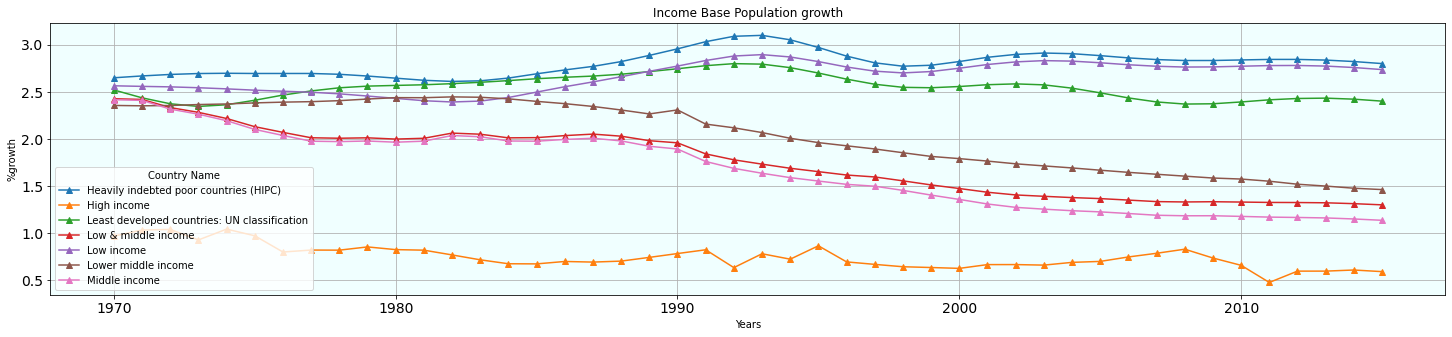

In [285]:
plt.rcParams['figure.figsize']=(25,5)
graph_1.plot( kind="line",xlabel = "Years" , ylabel = "%growth",
               title="Income Base Population growth",   
               fontsize = 14,figsize=(25,5),
                 grid=True,linewidth =1.5, 
                marker = "^").patch.set_facecolor('#f0ffff')

***Education Analysis for girls***

In [286]:
# first last five years i.e. 2010-2015  - columns.
# for girls enr0llment primary, secondary, and tartiary - indicator code.
# for girls transtition data  p-s and s-t  - indicator code.
# region-wise, income-wise. region name, income-wise

In [287]:
girl_eduction_income=Income_df.copy()

In [288]:
girl_education_income_notnull=girl_eduction_income.loc[:,['Indicator Code','2010','2011','2012','2013','2014','2015']].dropna()

Graph for erllments in primary education for girls

In [289]:
girl_education_income_primary=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.PRE.ENRL.FE']

In [290]:
girl_education_income_primary.drop(['Indicator Code'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [291]:
graph_2a=girl_education_income_primary.transpose()

Graph for enrollment in Secondry education girls

In [292]:
girl_education_income_secondry=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.SEC.ENRL.FE']
girl_education_income_secondry.drop(['Indicator Code'],axis=1,inplace=True)
graph_2b=girl_education_income_secondry.transpose()

Female enrollment in tertiary eduction wrt income

In [293]:
girl_education_income_tertiary=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.TER.ENRL.FE']
girl_education_income_tertiary.drop(['Indicator Code'],axis=1,inplace=True)
graph_2c=girl_education_income_tertiary.transpose()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0da7987350>,
      dtype=object)

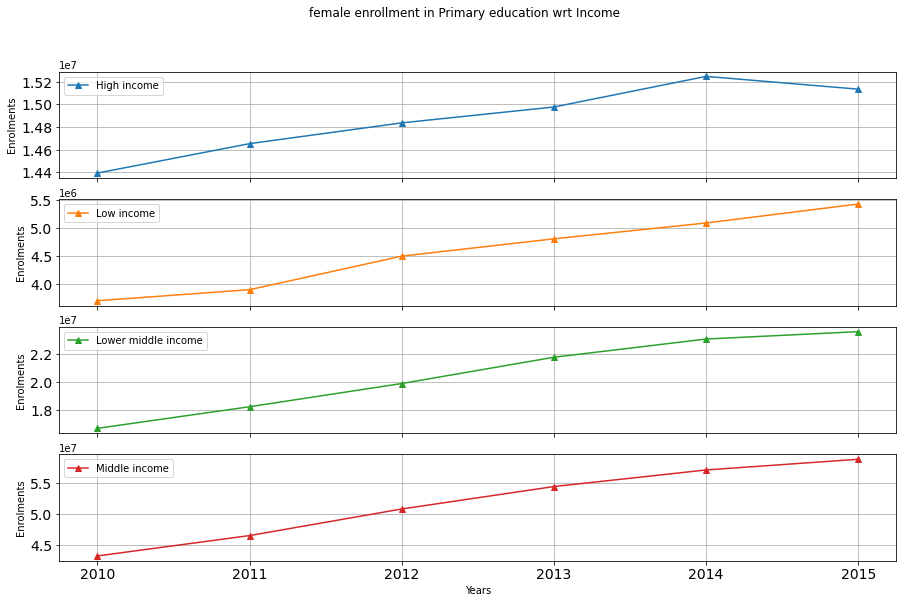

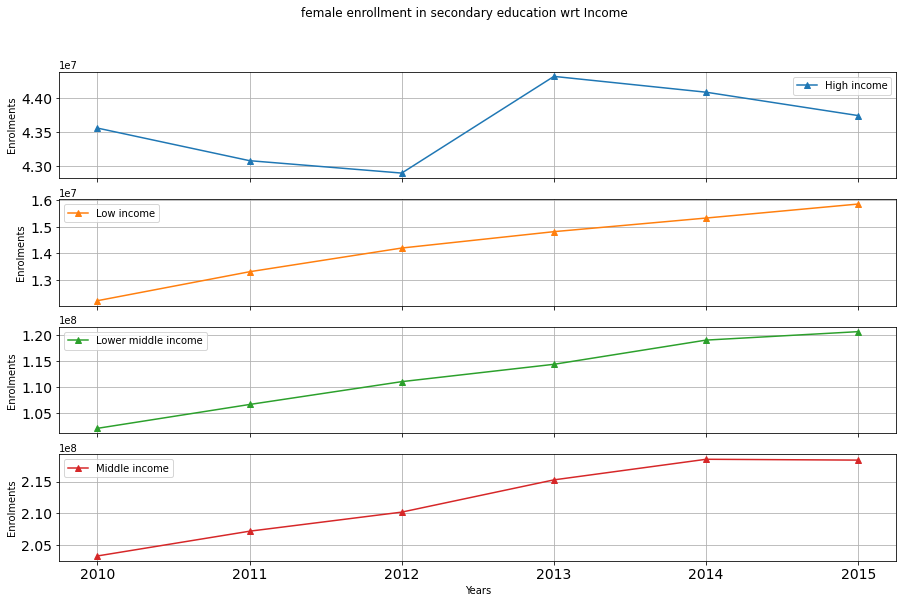

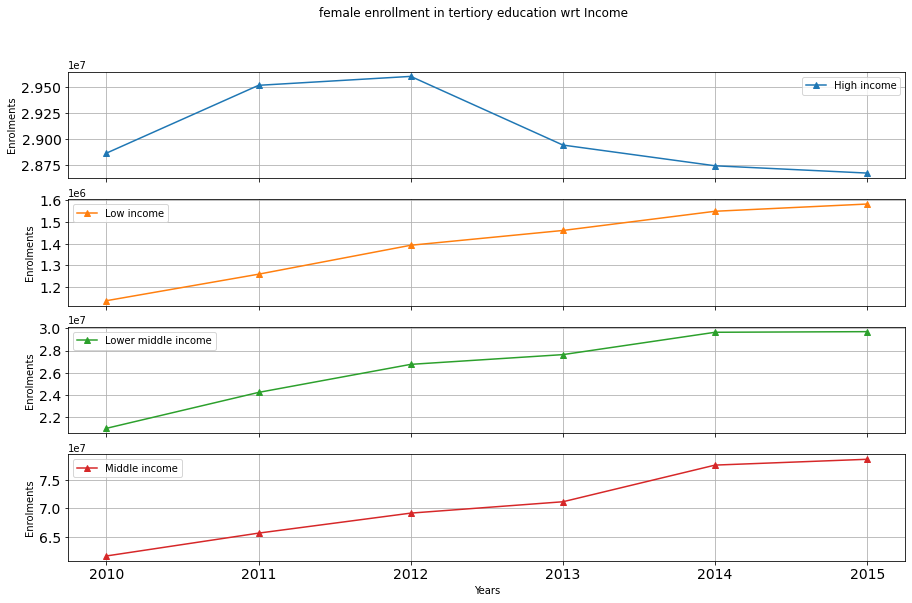

In [294]:
# Subplotting the chart of all three female enrollment wrt income.
plt.rcParams['figure.figsize']=(10,5)
graph_2a.plot( kind="line",xlabel = "Years" , ylabel = "Enrolments",
               title="female enrollment in Primary education wrt Income",   
               figsize=(15,9), fontsize = 14,subplots=True,
                 grid=True,linewidth =1.5, 
                marker = "^")

plt.rcParams['figure.figsize']=(10,5)
graph_2b.plot( kind="line",xlabel = "Years" , ylabel = "Enrolments",
              title="female enrollment in secondary education wrt Income",   
               figsize=(15,9), fontsize = 14,subplots=True,
                 grid=True,linewidth =1.5, 
                marker = "^")


plt.rcParams['figure.figsize']=(10,5)
graph_2c.plot( kind="line",xlabel = "Years" , ylabel = "Enrolments",
              title="female enrollment in tertiory education wrt Income",   
               figsize=(15,9), fontsize = 14,subplots=True,
                 grid=True,linewidth =1.5, 
                marker = "^")            

In [295]:
country_income_df=country_df[['Income Group','Region','Short Name']]

In [296]:
country_income_df.set_index(country_income_df['Income Group'],inplace=True)

In [297]:
graph=country_income_df.loc[['High income: nonOECD','High income: OECD','Low income','Upper middle income','Lower middle income'],['Region','Short Name']].transpose()

Country and their GDP and per capita GDP

In [298]:
graph_3a=main_data.loc[main_data['Indicator Code']=='NY.GDP.MKTP.CD','2015'].drop(['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income','World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)','Upper middle income'],axis=0).dropna()

In [299]:
df = graph_3a.to_frame(name="2015")
country_above_mean_gdp=df[df['2015']>np.mean(df['2015'])]
Mean_GDP = np.mean(df['2015'])
Mean_GDP

374979491861.97833

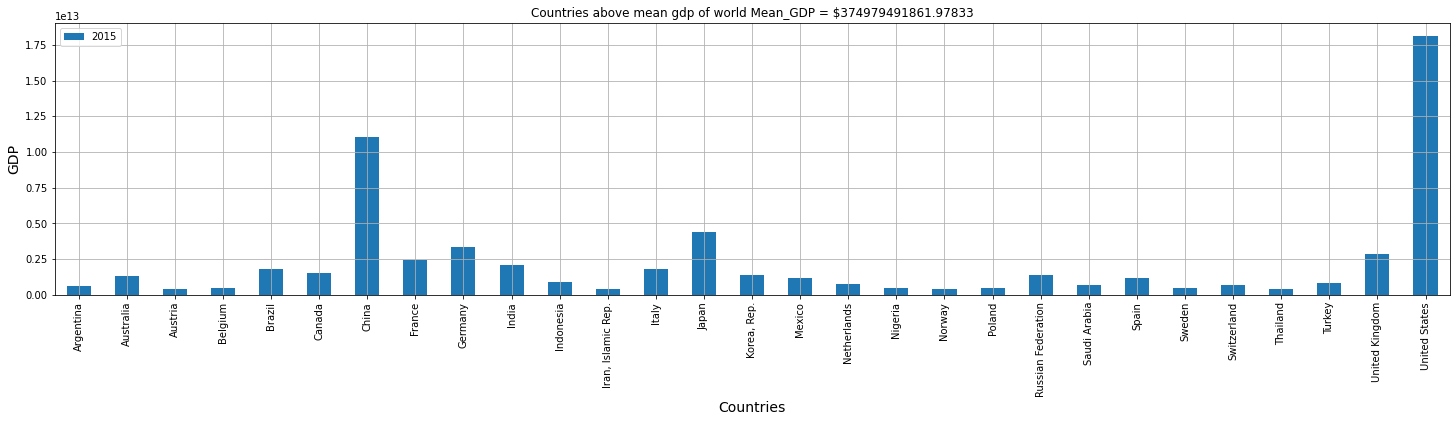

In [300]:
plt.rcParams['figure.figsize']=(25,5)
country_above_mean_gdp.plot(kind='bar')
plt.grid(True)
plt.title(f'Countries above mean gdp of world Mean_GDP = ${Mean_GDP}')
plt.xlabel('Countries',fontsize=14)
plt.ylabel('GDP',fontsize=14)
plt.show()

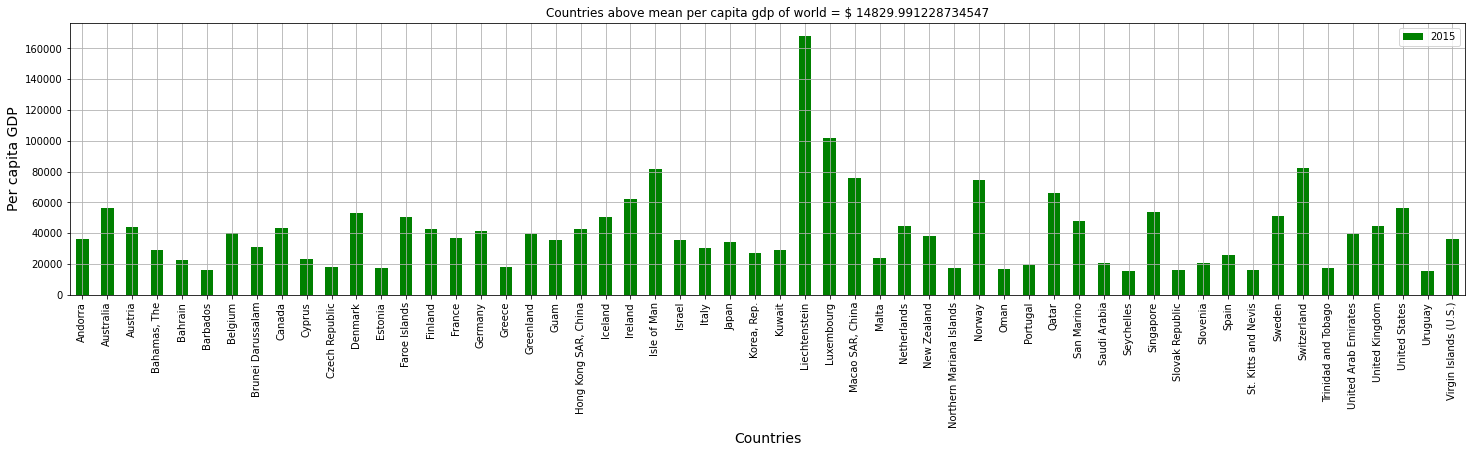

In [301]:
graph_3b=main_data.loc[main_data['Indicator Code']=='NY.GDP.PCAP.CD','2015'].drop(['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income','World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)','Upper middle income'],axis=0).dropna()
df_1 = graph_3b.to_frame(name="2015")
country_above_mean_pcgdp=df_1[df_1['2015']>np.mean(df_1['2015'])]
mean_percapita_gdp=np.mean(df_1['2015'])
plt.rcParams['figure.figsize']=(25,5)
country_above_mean_pcgdp.plot(kind='bar',color='Green')
plt.grid(True)
plt.title(f'Countries above mean per capita gdp of world = $ {mean_percapita_gdp}')
plt.xlabel('Countries',fontsize=14)
plt.ylabel('Per capita GDP',fontsize=14)
plt.show()

**Kid not getting primary level entry in school**

In [302]:
no_primary_enrollment =Income_df[Income_df['Indicator Code']=='SE.PRM.UNER']
graph_4a=no_primary_enrollment.transpose()
graph_4a.drop(['Indicator Name','Indicator Code'],axis=0,inplace=True)
graph_4a.dropna(inplace=True)

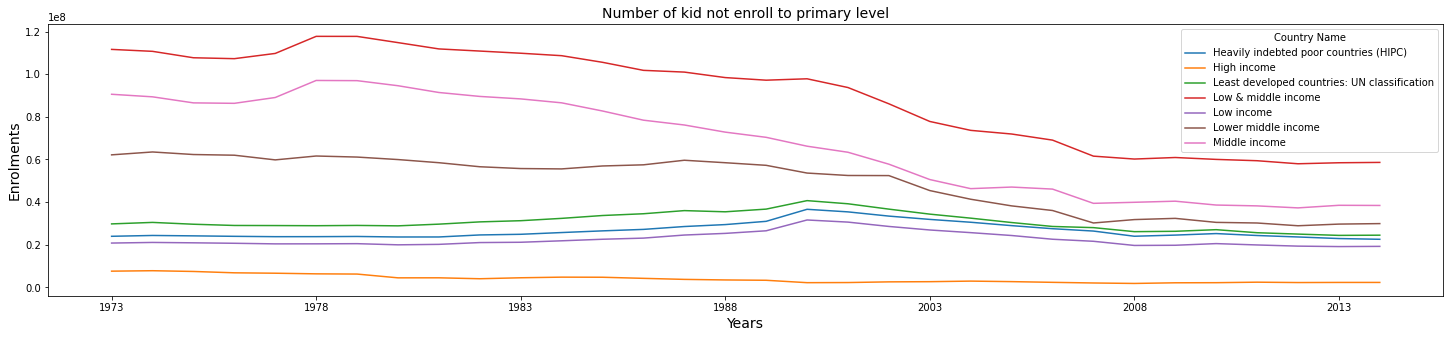

In [303]:
plt.rcParams['figure.figsize']=(25,5)
graph_4a.plot()
plt.title('Number of kid not enroll to primary level',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Enrolments',fontsize=14)
plt.show()

Pupil to teacher ration in primary education and secondry education 


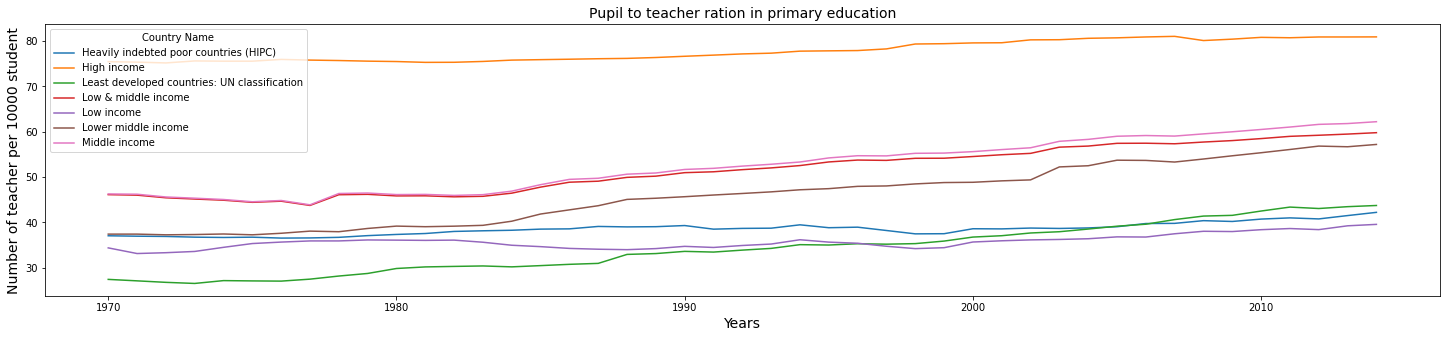

In [304]:
no_primary_enrollment =Income_df[Income_df['Indicator Code']=='SE.PRM.TCHR.FE.ZS']
graph_4b=no_primary_enrollment.transpose()
graph_4b.drop(['Indicator Name','Indicator Code'],axis=0,inplace=True)
graph_4b.dropna(inplace=True)
plt.rcParams['figure.figsize']=(25,5)
graph_4b.plot()
plt.title('Pupil to teacher ration in primary education',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Number of teacher per 10000 student',fontsize=14)
plt.show()

No. of countries lie in which inccome Group

In [305]:
Countries_incomegroup=country_df[['Income Group','Short Name']].groupby(country_df[['Income Group','Short Name']]['Income Group']).agg({'Short Name':'count'})
Countries_incomegroup.rename(columns = {'Income Group':'new_col1', 'Short Name':'new_col2'}, inplace = True)
Countries_incomegroup


,new_col2
Income Group,
High income: OECD,31
High income: nonOECD,44
Low income,34
Lower middle income,50
Upper middle income,55


In [306]:
Income = ['High income: OECD','High income: nonOECD','Low income','Lower middle income','Upper middle income']

data = [31,44,34,50,55]

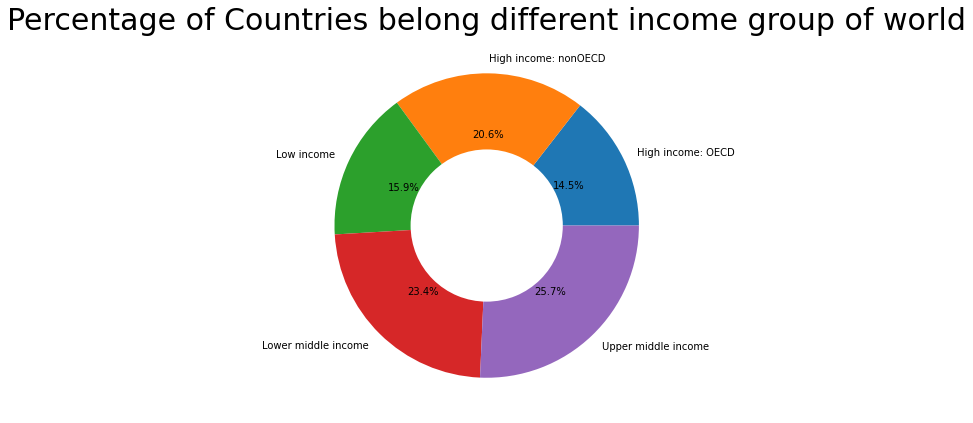

In [327]:
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = Income,autopct='%0.1f%%',radius=1)
plt.pie([100],colors=['w'],radius=0.5)
plt.title('Percentage of Countries belong different income group of world',color='Black',fontsize=30)
 
# show plot
plt.show()

% share of GDP of world

In [308]:
GDP_Share =Income_df[Income_df['Indicator Code']=='NY.GDP.MKTP.CD']
GDP_Share.loc[['High income', 'Middle income', 'Low income', 'Lower middle income',],['2015']]
name = ['High income', 'Middle income', 'Low income', 'Lower middle income',]
quantity=[4.757751e+13,2.679605e+13,4.023901e+11,6.017050e+12]

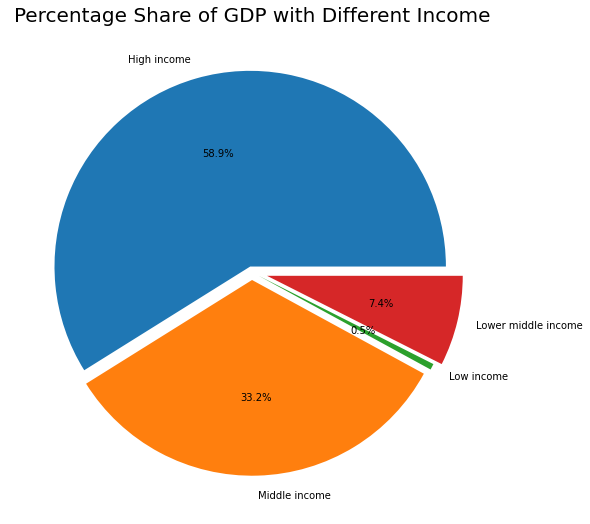

In [330]:
fig = plt.figure(figsize =(15,9))
plt.pie(quantity,labels=name,autopct='%0.1f%%', explode = [0.03,0.04,0.04,0.08])
plt.title('Percentage Share of GDP with Different Income',color='Black',fontsize=20)
plt.show()

Data for world and India


In [310]:
clean_data=new_data[['Country Name','Indicator Code','2015']] #Data cleaning

In [311]:
Sorted=clean_data[clean_data['Indicator Code']=='SL.TLF.TOTL.IN'].set_index(['Country Name'])

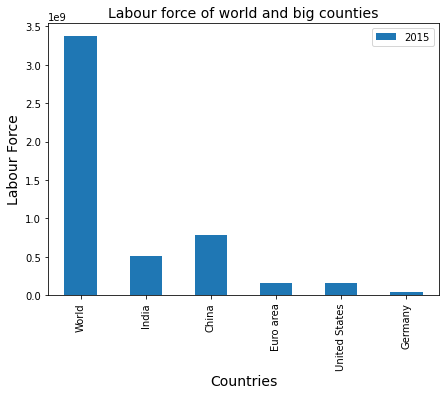

In [312]:
Sorted1=Sorted.copy()
Sorted1.drop("Indicator Code",axis=1,inplace=True)
GraphX=Sorted1.loc[['World','India','China','Euro area','United States','Germany']]
plt.rcParams['figure.figsize']=(7,5)
GraphX.plot(kind='bar')
plt.title('Labour force of world and big counties',fontsize=14)
plt.xlabel('Countries',fontsize=14)
plt.ylabel('Labour Force',fontsize=14)
plt.show()

In [313]:
Sorted2=Sorted.copy()
Sorted2['perlabour Force']=Sorted2['2015']*100/3.371100e+09
Sorted2.drop(['Indicator Code','2015'],axis=1,inplace=True)



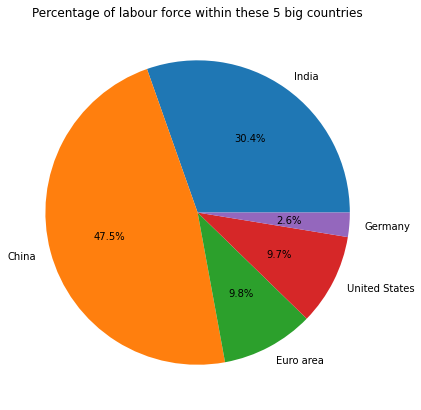

In [314]:
GraphY=['India','China','Euro area','United States','Germany']
q=[14.945641,23.348753,4.834253,4.769000,1.269040]
fig = plt.figure(figsize =(10, 7))
plt.pie(q,labels=GraphY,autopct='%0.1f%%')
plt.title('Percentage of labour force within these 5 big countries')
plt.show()


Correlation of Various Parameters with each Other

In [315]:
nn=pd.read_csv(path3)# World,China,India,United States,Germany,Euro area
nn.set_index('Indicator Code',inplace=True)
nn2=nn.loc[['SE.ADT.1524.LT.ZS','NY.GDP.PCAP.CD','SL.UEM.TOTL.ZS','SL.TLF.TOTL.IN'],['Country Name','2010']]

In [316]:
World={'GDP percapita':[9.516347e+03,4.560513e+03,1.345770e+03,4.837388e+04,4.178556e+04,3.761772e+04],'total unemployment':[6.081802e+00,4.200000e+00,3.600000e+00,4.837388e+04,7.000000e+00,1.013016e+01],'total illiterate workforce':[3.181296e+09,7.799515e+08,4.706091e+08,1.570211e+08,4.201639e+07,1.614402e+08]}

In [317]:
cor=pd.DataFrame(World,index=['World','China','India','United States','Germany','Euro area'])
cor

,GDP percapita,total unemployment,total illiterate workforce
World,9516.347,6.081802,3.181296e+09
China,4560.513,4.200000,7.799515e+08
India,1345.770,3.600000,4.706091e+08
United States,48373.880,48373.880000,1.570211e+08
Germany,41785.560,7.000000,4.201639e+07
Euro area,37617.720,10.130160,1.614402e+08


In [318]:
final_cor=cor.corr()
final_cor

,GDP percapita,total unemployment,total illiterate workforce
GDP percapita,1.000000,0.572886,-0.513668
total unemployment,0.572886,1.000000,-0.262447
total illiterate workforce,-0.513668,-0.262447,1.000000


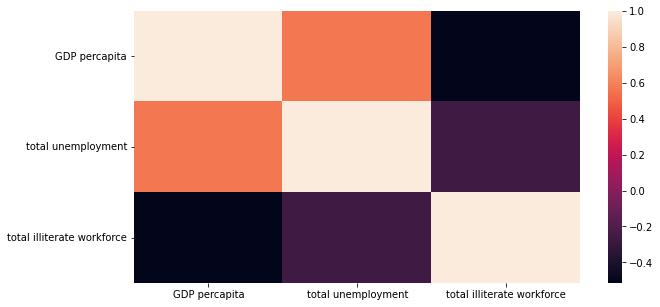

In [319]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(final_cor)

In [320]:
exp1=pd.read_csv(path3)

In [321]:
# indicator code, country name, country code,
exp1.set_index('Indicator Code',inplace=True)
exp2=exp1.loc[['SE.XPD.TOTL.GD.ZS'],['Country Name','Country Code','2004']]
exp2.set_index('Country Name',inplace=True)
exp3=exp2.drop(['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income','World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)','Upper middle income'],axis=0).dropna()

In [322]:
exp3.drop('Country Code',axis=1,inplace=True)
exp3.transpose()

Country Name,Albania,Andorra,Argentina,Armenia,Aruba,Austria,Azerbaijan,Bangladesh,Barbados,Belarus,...,Togo,Tonga,Tunisia,Turkey,Uganda,Ukraine,United Kingdom,United States,Uruguay,Zambia
2004,3.17017,1.53254,3.48735,2.48406,4.4089,5.31006,3.44766,1.94193,5.90406,5.71132,...,3.63333,3.90804,6.72078,3.11757,4.96974,5.31006,4.80557,5.31416,2.49859,2.46343


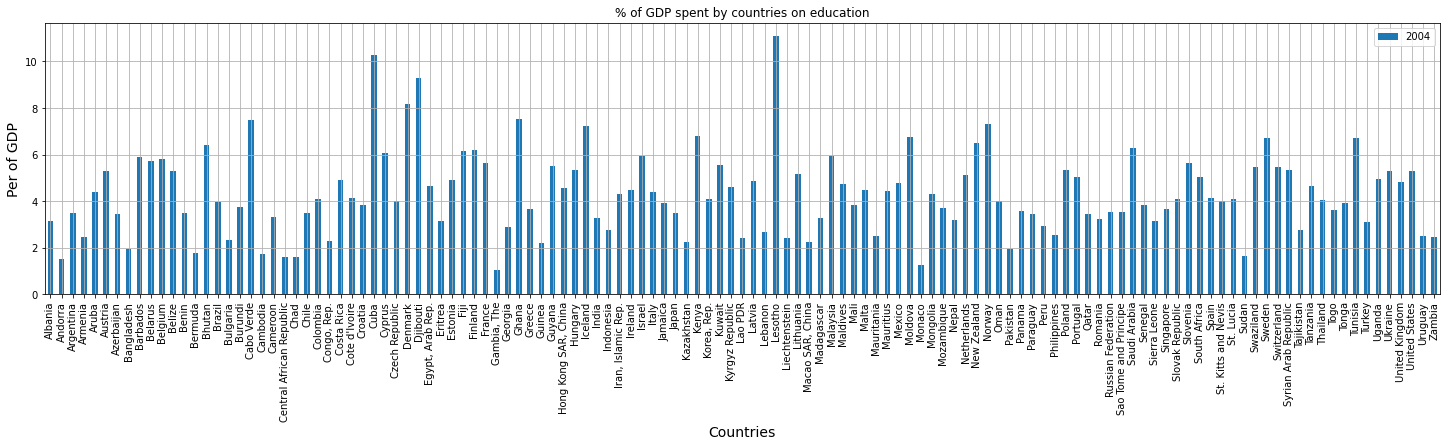

In [323]:
plt.rcParams['figure.figsize']=(25,5)
exp3.plot(kind='bar')
plt.grid(True)
plt.title('% of GDP spent by countries on education')
plt.xlabel('Countries',fontsize=14)
plt.ylabel('Per of GDP',fontsize=14)
plt.show()

In [324]:
exp1_1=pd.read_csv(path3)
exp1_1.set_index('Indicator Code',inplace=True)
exp2_1=exp1_1.loc[['SE.XPD.TOTL.GD.ZS'],['Country Name','Country Code','1999', '2000', '2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009', '2010']]
exp2_1.set_index('Country Name',inplace=True)
exp3_1=exp2_1.drop(['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income','World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)','Upper middle income'],axis=0).dropna()
exp3_1.drop('Country Code',axis=1,inplace=True)
exp4_1=exp3_1.transpose()

In [325]:
exp4_1

Country Name,Argentina,Armenia,Austria,Azerbaijan,Benin,Colombia,Cote d'Ivoire,Cuba,Cyprus,Czech Republic,...,Slovak Republic,South Africa,Spain,Sweden,Switzerland,Tajikistan,Thailand,Togo,Tunisia,United Kingdom
1999,4.51408,2.23619,6.13795,4.21217,2.62048,4.42809,4.09449,6.75508,4.71968,3.68879,...,4.11247,5.87260,4.27280,6.92362,4.89592,2.07659,4.83249,4.18744,6.27099,4.06374
2000,4.58360,2.77633,5.60472,3.85399,2.88743,3.50333,3.70380,7.70486,4.89278,3.66536,...,3.87199,5.44197,4.17798,6.81987,4.78606,2.32863,5.25327,4.51075,6.20198,4.10980
2001,4.82829,2.46081,5.58878,3.50342,3.24010,3.70624,3.67073,8.35785,5.03351,3.76072,...,3.94199,5.16125,4.11710,6.68097,4.96211,2.37658,4.81336,4.18628,6.20183,4.17893
2002,4.01195,2.13892,5.54010,3.15449,2.94995,4.27376,4.08827,9.57120,5.48652,3.98989,...,4.25106,5.04762,4.13762,7.00070,5.32322,2.77580,3.86464,4.00874,5.79003,4.71955
2003,3.53420,2.15119,5.38185,3.28615,3.12000,4.33062,3.96629,9.94078,6.65670,4.15177,...,4.21721,4.85395,4.16962,6.85111,5.53856,2.42263,3.72402,4.19424,6.81673,4.88927
2004,3.48735,2.48406,5.31006,3.44766,3.50598,4.07620,4.12571,10.26828,6.08196,4.01744,...,4.10813,5.05277,4.15031,6.71100,5.45846,2.77208,4.03337,3.63333,6.72078,4.80557
2005,3.84376,2.71551,5.27167,2.97462,3.63625,3.99684,4.10655,10.55769,6.19600,3.89627,...,3.76522,5.05164,4.12810,6.55354,5.22361,3.51215,3.94087,3.39375,6.45157,5.01561
2006,4.11043,2.71188,5.26237,2.55551,3.50185,3.89228,4.00060,9.05729,6.22760,4.22046,...,3.71354,5.07026,4.15923,6.40877,4.98269,3.40348,4.05069,3.66957,6.43859,5.04410
2007,4.44269,3.01825,5.18300,2.54928,3.23094,4.05938,4.25834,11.86829,6.25248,3.87684,...,3.52932,4.97252,4.23648,6.20952,4.71263,3.41328,3.60168,3.69752,6.46552,4.96506
2008,4.84291,3.17115,5.29572,2.44093,3.80054,3.91051,4.36058,14.05908,6.72402,3.74839,...,3.52674,4.86486,4.48577,6.38620,4.89597,3.45983,3.50739,3.42958,6.27219,4.95671


In [326]:
cm = sns.light_palette("Blue", as_cmap=True)
exp4_1.style.background_gradient(cmap=cm).set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


Country Name,Argentina,Armenia,Austria,Azerbaijan,Benin,Colombia,Cote d'Ivoire,Cuba,Cyprus,Czech Republic,Denmark,Finland,France,"Gambia, The",Hungary,Iceland,"Iran, Islamic Rep.",Ireland,Israel,Italy,Kyrgyz Republic,"Macao SAR, China",Mauritius,Mexico,Moldova,Nepal,Netherlands,Norway,Peru,Poland,Portugal,Qatar,Slovak Republic,South Africa,Spain,Sweden,Switzerland,Tajikistan,Thailand,Togo,Tunisia,United Kingdom
1999,4.51,2.24,6.14,4.21,2.62,4.43,4.09,6.76,4.72,3.69,7.94,5.87,5.64,1.57,4.58,6.47,4.22,4.14,6.42,4.53,4.09,3.69,3.94,3.66,4.66,2.89,4.56,6.94,3.44,4.60,5.03,4.35,4.11,5.87,4.27,6.92,4.90,2.08,4.83,4.19,6.27,4.06
2000,4.58,2.78,5.60,3.85,2.89,3.50,3.70,7.70,4.89,3.67,8.07,5.73,5.50,1.47,4.88,6.50,4.03,4.15,6.11,4.30,3.51,3.68,3.82,4.14,4.49,2.98,4.63,6.46,3.22,4.99,5.18,3.73,3.87,5.44,4.18,6.82,4.79,2.33,5.25,4.51,6.20,4.11
2001,4.83,2.46,5.59,3.50,3.24,3.71,3.67,8.36,5.03,3.76,8.22,5.87,5.43,1.16,4.93,6.79,4.07,4.09,6.38,4.66,3.85,2.73,3.18,4.43,4.85,3.71,4.75,6.85,3.03,5.33,5.33,3.20,3.94,5.16,4.12,6.68,4.96,2.38,4.81,4.19,6.20,4.18
2002,4.01,2.14,5.54,3.15,2.95,4.27,4.09,9.57,5.49,3.99,8.21,6.04,5.42,1.44,5.19,7.42,4.49,4.10,6.46,4.43,4.45,2.86,3.12,4.64,5.50,3.15,4.87,7.44,2.82,5.40,5.24,3.85,4.25,5.05,4.14,7.00,5.32,2.78,3.86,4.01,5.79,4.72
2003,3.53,2.15,5.38,3.29,3.12,4.33,3.97,9.94,6.66,4.15,8.10,6.16,5.71,1.36,5.80,7.33,4.38,4.19,6.36,4.56,4.48,2.80,4.48,5.18,5.42,3.12,5.10,7.42,2.94,5.33,5.28,3.37,4.22,4.85,4.17,6.85,5.54,2.42,3.72,4.19,6.82,4.89
2004,3.49,2.48,5.31,3.45,3.51,4.08,4.13,10.27,6.08,4.02,8.19,6.19,5.64,1.03,5.36,7.22,4.29,4.49,5.95,4.39,4.62,2.25,4.46,4.80,6.77,3.17,5.11,7.31,2.96,5.36,5.05,3.46,4.11,5.05,4.15,6.71,5.46,2.77,4.03,3.63,6.72,4.81
2005,3.84,2.72,5.27,2.97,3.64,4.00,4.11,10.56,6.20,3.90,8.07,6.05,5.51,1.14,5.34,7.42,4.20,4.53,5.75,4.25,4.87,2.29,4.19,4.91,7.16,3.36,5.16,6.87,2.84,5.43,5.06,3.96,3.77,5.05,4.13,6.55,5.22,3.51,3.94,3.39,6.45,5.02
2006,4.11,2.71,5.26,2.56,3.50,3.89,4.00,9.06,6.23,4.22,7.74,5.92,5.45,1.21,5.32,7.35,4.42,4.55,5.75,4.53,5.54,2.21,3.83,4.76,7.50,3.61,5.09,6.37,2.66,5.20,4.92,2.71,3.71,5.07,4.16,6.41,4.98,3.40,4.05,3.67,6.44,5.04
2007,4.44,3.02,5.18,2.55,3.23,4.06,4.26,11.87,6.25,3.88,7.61,5.67,5.43,1.31,5.16,7.08,4.74,4.72,5.48,4.12,6.46,2.06,3.18,4.73,8.29,3.52,4.94,6.53,2.63,4.86,4.94,2.45,3.53,4.97,4.24,6.21,4.71,3.41,3.60,3.70,6.47,4.97
2008,4.84,3.17,5.30,2.44,3.80,3.91,4.36,14.06,6.72,3.75,7.48,5.84,5.43,3.53,5.00,7.26,4.06,5.44,5.52,4.41,5.91,2.20,3.07,4.84,8.24,3.80,5.09,6.28,2.87,5.03,4.70,4.23,3.53,4.86,4.49,6.39,4.90,3.46,3.51,3.43,6.27,4.96
